这一整串代码实现的功能有
1.一键处理所有图片，提高红色与环境色的对比度——已经完成
2.高斯模糊——已经完成
3.降低高光部分，调暗——已经完成
4.图片去重——待完成，csdn开源
5.高斯滤波——已经完成
6.输出苹果的数量——老师来
7.精准标记苹果的坐标——老师来
8.输出每一个苹果灰度直方图——已经完成——也可以是总的图片——需要output


我们先实现图片的重复识别与去重吧！！！
使用opencv自带的末班匹配
可以使用opencv提供的matchtemplate方法来判断两幅图像的相似度，如果相似度大于0.8，就认为这两幅图像是先相同

In [20]:
#这段代码已经实现了图片的重复识别
import cv2
import os
import sys

PIC_PATH = "Attachment_1"  # 照片文件夹地址
width, height = 100, 100  # 缩放比例

pic_file = os.listdir(PIC_PATH)  # 所有照片文件列表
same_pic_index = []  # 相同图像的索引列表
imgs = []  # 缩放后 相同图像的集合
count = len(pic_file)  # 照片数量

if count == 0:  # 如果照片数量为零
    print("没有图像")
    sys.exit(0)  # 停止程序

for file_name in pic_file:  # 遍历图像文件
    img = cv2.imread(os.path.join(PIC_PATH, file_name))  # 读取图像
    img = cv2.resize(img, (width, height))  # 缩放成统一大小
    imgs.append(img)  # 按文件顺序保存图像对象

has_same = set()  # 用于记录已经找到相同图像的索引

for i in range(count - 1):  # 遍历所有图像文件，不遍历最后一个图像
    if i in has_same:  # 如果此图像已经找到相同的图像
        continue  # 跳过
    templ = imgs[i]  # 取出模板图像
    same = [i]  # 与templ内容相同的图像索引列表
    for j in range(i + 1, count):  # 从 i+1 开始遍历，避免重复比较
        if j in has_same:  # 如果此图像已经找到相同的图像
            continue  # 跳过
        pic = imgs[j]  # 取出对照图像
        results = cv2.matchTemplate(pic, templ, cv2.TM_CCOEFF_NORMED)  # 比较两图像相似度
        if results > 0.8:  # 如果相似度大于80%，认为是同一张照片
            same.append(j)  # 记录对照图像的索引
            has_same.add(i)  # 模板图像已找到相同图像
            has_same.add(j)  # 对照图像已找到相同图像
    if len(same) > 1:  # 如果模板图像找到了至少一张与自己相同的图像
        same_pic_index.append(same)  # 记录相同图像的索引

for same_list in same_pic_index:  # 遍历所有相同图像的索引
    text = "相同的照片："
    for same in same_list:
        text += str(pic_file[same]) + ", "  # 拼接文件名
    print(text)

相同的照片：162.jpg, 140.jpg, 
相同的照片：200.jpg, 196.jpg, 
相同的照片：175.jpg, 159.jpg, 
相同的照片：174.jpg, 190.jpg, 
相同的照片：61.jpg, 72.jpg, 
相同的照片：59.jpg, 166.jpg, 
相同的照片：158.jpg, 173.jpg, 
相同的照片：198.jpg, 194.jpg, 
相同的照片：66.jpg, 95.jpg, 
相同的照片：28.jpg, 55.jpg, 
相同的照片：129.jpg, 114.jpg, 
相同的照片：113.jpg, 83.jpg, 
相同的照片：107.jpg, 130.jpg, 6.jpg, 
相同的照片：104.jpg, 84.jpg, 
相同的照片：110.jpg, 85.jpg, 
相同的照片：105.jpg, 123.jpg, 
相同的照片：134.jpg, 154.jpg, 
相同的照片：132.jpg, 153.jpg, 
相同的照片：30.jpg, 143.jpg, 
相同的照片：25.jpg, 147.jpg, 


In [ ]:
pip install colorcet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义高斯波函数
def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x-x0)**2+(y-y0)**2)/(2*sigma**2))

# 创建网格
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)

# 计算高斯波
Z = gaussian(X, Y, 0, 0, 0.3)

# 创建3D轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制图像
surf = ax.plot_surface(X, Y, Z, cmap='jet')

# 设置坐标轴标签
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# 添加颜色条
fig.colorbar(surf)

# 显示图像
plt.show()


In [29]:
#这段代码实现的是对单个图片实现提高对比度的的操作
import time
import numpy as np
import cv2
 
 
def lighting(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0+max_v*bright
    print('bright: ', bright, 'mid: ', mid)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
    thresh = gray*gray
    t = np.mean(thresh)
    mask = np.where(thresh > t, 255, 0).astype(np.float32)
    brightrate = np.zeros_like(mask).astype(np.float32)
    h, w = img.shape[:2]
    # 遍历每个像素点
    for i in range(h):
        for j in range(w):
            if mask[i, j] == 255.0:
                mask[i, j] = mid
                brightrate[i, j] = bright
            else:
                mask[i, j] = (mid-1.0)/t*thresh[i, j]+1.0
                brightrate[i, j] = (1.0/t*thresh[i, j])*bright
    img = img/255.0
    img = np.power(img, 1.0/mask[:, :, np.newaxis])*(1.0/(1.0-brightrate[:, :, np.newaxis]))
    img = np.clip(img, 0, 1.0)*255.0
    return img.astype(np.uint8)
 
 
def lighting_fast(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0+max_v*bright
    print('bright: ', bright, 'mid: ', mid)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
    thresh = gray*gray
    t = np.mean(thresh)
    # 使用numpy来计算可以加速，速度远快于上面的遍历
    mask = np.where(thresh > t, 255, 0).astype(np.float32)
    brightrate = np.where(mask == 255.0, bright, (1.0/t*thresh)*bright)
    mask = np.where(mask == 255.0, mid, (mid-1.0)/t*thresh+1.0)
    img = img/255.0
    img = np.power(img, 1.0/mask[:, :, np.newaxis])*(1.0/(1.0-brightrate[:, :, np.newaxis]))
    img = np.clip(img, 0, 1.0)*255.0
    return img.astype(np.uint8)
 
 
if __name__ == '__main__':
    input_img = cv2.imread('//Users/zhangying/太阳没了在呢么样？.jpg')
    light = -75
    start_time = time.time()
    res = lighting(input_img, light)
    print('time: {:.3f} s'.format(time.time() - start_time))
    cv2.imwrite('tmp/302_lighting_{}.jpg'.format(light), res)
    start_time = time.time()
    res = lighting_fast(input_img, light)
    print('fast time: {:.3f} s'.format(time.time() - start_time))
    cv2.imwrite('快看我怎么样！！！！.jpg'.format(light), res)

bright:  -0.1875 mid:  0.25
time: 0.109 s
bright:  -0.1875 mid:  0.25
fast time: 0.002 s


In [5]:
#现在尝试美图秀秀的方法，增加蒙版
import time
import numpy as np
import cv2

def adjust_saturation(img, red_saturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a mask for red pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result


def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a mask for red pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    # Create an inverse mask for non-red pixels
    non_red_mask = cv2.bitwise_not(red_mask)

    # Darken non-red pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.7)  # Decrease brightness for non-red pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(red_mask, non_red_mask)

    return final_mask


def process_image(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0+max_v*bright

    # Adjust saturation of red pixels
    result = adjust_saturation(img, red_saturate_factor=1.5)

    # Create mask for non-red pixels
    mask = create_mask(img)

    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

    return final_result


if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/1.jpg')
    light = -75
    start_time = time.time()

    # Process the image
    res = process_image(input_img, light)

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('快看我怎么样！！.jpg', res)





time: 0.003 s


In [ ]:
#这段代码最关键了，对所有图片都进习惯一样的曝光操作
import time
import numpy as np
import cv2
import os

def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
 
def lighting(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0+max_v*bright
    print('bright: ', bright, 'mid: ', mid)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
    thresh = gray*gray
    t = np.mean(thresh)
    mask = np.where(thresh > t, 255, 0).astype(np.float32)
    brightrate = np.zeros_like(mask).astype(np.float32)
    h, w = img.shape[:2]
    # 遍历每个像素点
    for i in range(h):
        for j in range(w):
            if mask[i, j] == 255.0:
                mask[i, j] = mid
                brightrate[i, j] = bright
            else:
                mask[i, j] = (mid-1.0)/t*thresh[i, j]+1.0
                brightrate[i, j] = (1.0/t*thresh[i, j])*bright
    img = img/255.0
    img = np.power(img, 1.0/mask[:, :, np.newaxis])*(1.0/(1.0-brightrate[:, :, np.newaxis]))
    img = np.clip(img, 0, 1.0)*255.0
    return img.astype(np.uint8)
 
 
def lighting_fast(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0+max_v*bright
    print('bright: ', bright, 'mid: ', mid)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
    thresh = gray*gray
    t = np.mean(thresh)
    # 使用numpy来计算可以加速，速度远快于上面的遍历
    mask = np.where(thresh > t, 255, 0).astype(np.float32)
    brightrate = np.where(mask == 255.0, bright, (1.0/t*thresh)*bright)
    mask = np.where(mask == 255.0, mid, (mid-1.0)/t*thresh+1.0)
    img = img/255.0
    img = np.power(img, 1.0/mask[:, :, np.newaxis])*(1.0/(1.0-brightrate[:, :, np.newaxis]))
    img = np.clip(img, 0, 1.0)*255.0
    return img.astype(np.uint8)
 
 

if __name__ == '__main__':
    # 添加循环处理多张图片的代码
    input_directory = 'Attachment_1'
    output_directory = 'Attachment_2'
    light = -75

    for image_index in range(1, 201):
        input_img = cv2.imread(f'{input_directory}/{image_index}.jpg')
        start_time = time.time()
        res = lighting_fast(input_img, light)
        print(f'处理第 {image_index} 张图片，耗时: {time.time() - start_time:.3f} s')
        create_directory(output_directory)
        cv2.imwrite(f'{output_directory}/{image_index}_processed.jpg', res)

In [6]:
#创建蒙版，降低亮度
import time
import numpy as np
import cv2

def adjust_saturation(img, red_saturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a mask for red pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result


def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define a mask for red pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    # Create an inverse mask for non-red pixels
    non_red_mask = cv2.bitwise_not(red_mask)

    # Darken non-red pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.7)  # Decrease brightness for non-red pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(red_mask, non_red_mask)

    return final_mask


if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/1.jpg')
    red_saturate_factor = 1.5  # You can adjust this factor for the desired saturation increase
    start_time = time.time()
    
    # Adjust saturation of red pixels
    result = adjust_saturation(input_img, red_saturate_factor)
    
    # Create mask for non-red pixels
    mask = create_mask(input_img)
    
    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(input_img, input_img, mask=cv2.bitwise_not(mask)))

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('快看我怎么样？e.jpg', final_result)

time: 0.002 s


In [8]:
#继续增加红色饱和度，降低亮度
import time
import numpy as np
import cv2

def adjust_colors(img, red_saturate_factor, other_desaturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, and blue pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(red_mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])

    # Decrease brightness of non-red pixels
    hsv[:, :, 2] = np.where(np.logical_or(green_mask[:, :] == 255, blue_mask[:, :] == 255),
                            np.clip(hsv[:, :, 2] * other_desaturate_factor, 0, 255), hsv[:, :, 2])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result


def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, and blue pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Create masks for non-red, non-green, and non-blue pixels
    non_red_mask = cv2.bitwise_and(cv2.bitwise_not(red_mask), 255 - red_mask)
    non_green_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), 255 - green_mask)
    non_blue_mask = cv2.bitwise_and(cv2.bitwise_not(blue_mask), 255 - blue_mask)

    # Darken non-red, non-green, and non-blue pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.3)  # Decrease brightness for non-red, non-green, and non-blue pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(cv2.bitwise_or(non_red_mask, non_green_mask), non_blue_mask)

    return final_mask


def process_image(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0 + max_v * bright

    # Adjust colors and saturation
    result = adjust_colors(img, red_saturate_factor=1.8, other_desaturate_factor=0.3)

    # Create mask for non-red, non-green, and non-blue pixels
    mask = create_mask(img)

    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

    return final_result


if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/1.jpg')
    light = -75
    start_time = time.time()

    # Process the image
    res = process_image(input_img, light)

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('现在怎么样？.jpg', res)

time: 0.003 s


沙雕太阳！！！！

In [28]:
#
import time
import numpy as np
import cv2

def adjust_colors(img, red_saturate_factor, other_desaturate_factor, sun_desaturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(red_mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])
    # 将太阳像素的饱和度设为零
    hsv[:, :, 1] = np.where(sun_mask[:, :] == 255, 0, hsv[:, :, 1])
    # Decrease brightness of non-red, non-green, and non-blue pixels
    hsv[:, :, 2] = np.where(np.logical_or(np.logical_or(green_mask[:, :] == 255, blue_mask[:, :] == 255), sun_mask[:, :] == 255),
                            np.clip(hsv[:, :, 2] * other_desaturate_factor, 0, 255), hsv[:, :, 2])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result


def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Create masks for non-red, non-green, non-blue, and non-sun pixels
    non_red_mask = cv2.bitwise_and(cv2.bitwise_not(red_mask), 255 - red_mask)
    non_green_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), 255 - green_mask)
    non_blue_mask = cv2.bitwise_and(cv2.bitwise_not(blue_mask), 255 - blue_mask)
    non_sun_mask = cv2.bitwise_and(cv2.bitwise_not(sun_mask), 255 - sun_mask)

    # Darken non-red, non-green, non-blue, and non-sun pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.3)  # Decrease brightness for non-red, non-green, non-blue, and non-sun pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(cv2.bitwise_or(cv2.bitwise_or(non_red_mask, non_green_mask), non_blue_mask), non_sun_mask)

    return final_mask


def process_image(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0 + max_v * bright

    # Adjust colors and saturation
    result = adjust_colors(img, red_saturate_factor=1.8, other_desaturate_factor=0, sun_desaturate_factor=0)

    # Create mask for non-red, non-green, non-blue, and non-sun pixels
    mask = create_mask(img)

    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

    return final_result


if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/.jpg')
    light = -100
    start_time = time.time()

    # Process the image
    res = process_image(input_img, light)

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('太阳没了在呢么样？.jpg', res)
    


time: 0.003 s


太阳真的会消失吗？
我吃悲观态度

In [31]:
import time
import numpy as np
import cv2

def adjust_colors(img, red_saturate_factor, other_desaturate_factor, sun_desaturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(red_mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])

    # Set saturation of sun pixels to zero
    hsv[:, :, 1] = np.where(sun_mask[:, :] == 255, 0, hsv[:, :, 1])

    # Decrease brightness of non-red, non-green, and non-blue pixels
    hsv[:, :, 2] = np.where(np.logical_or(np.logical_or(green_mask[:, :] == 255, blue_mask[:, :] == 255), sun_mask[:, :] == 255),
                            np.clip(hsv[:, :, 2] * other_desaturate_factor, 0, 255), hsv[:, :, 2])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result

def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Create masks for non-red, non-green, non-blue, and non-sun pixels
    non_red_mask = cv2.bitwise_and(cv2.bitwise_not(red_mask), 255 - red_mask)
    non_green_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), 255 - green_mask)
    non_blue_mask = cv2.bitwise_and(cv2.bitwise_not(blue_mask), 255 - blue_mask)
    non_sun_mask = cv2.bitwise_and(cv2.bitwise_not(sun_mask), 255 - sun_mask)

    # Darken non-red, non-green, non-blue, and non-sun pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.3)  # Decrease brightness for non-red, non-green, non-blue, and non-sun pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(cv2.bitwise_or(cv2.bitwise_or(non_red_mask, non_green_mask), non_blue_mask), non_sun_mask)

    return final_mask

def process_image(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0 + max_v * bright

    # Adjust colors and saturation
    result = adjust_colors(img, red_saturate_factor=1.8, other_desaturate_factor=0, sun_desaturate_factor=0)

    # Create mask for non-red, non-green, non-blue, and non-sun pixels
    mask = create_mask(img)

    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

    return final_result

if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/1.jpg')
    light = -100
    start_time = time.time()

    # Process the image
    res = process_image(input_img, light)

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('太阳没了在呢么样？.jpg', res)

time: 0.003 s


物理学不存在了，太阳毁灭吧

In [32]:
import time
import numpy as np
import cv2

def darken_top_left_corner(img, factor):
    height, width, _ = img.shape

    # Define the region of interest (ROI) for the top left corner
    roi_height = min(height // 2, 185)  # Choose the smaller of half height and 185
    roi_width = min(width // 2, 270)    # Choose the smaller of half width and 270

    roi = img[:roi_height, :roi_width]

    # Darken the ROI by multiplying it with the factor
    img[:roi_height, :roi_width] = np.clip(img[:roi_height, :roi_width] * factor, 0, 255).astype(np.uint8)

    return img

def adjust_colors(img, red_saturate_factor, other_desaturate_factor, sun_desaturate_factor):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Increase saturation of red pixels
    hsv[:, :, 1] = np.where(red_mask[:, :] == 255, np.clip(hsv[:, :, 1] * red_saturate_factor, 0, 255), hsv[:, :, 1])

    # Darken the sun pixels
    hsv[:, :, 2] = np.where(sun_mask[:, :] == 255, np.clip(hsv[:, :, 2] * sun_desaturate_factor, 0, 255), hsv[:, :, 2])

    # Decrease brightness of non-red, non-green, and non-blue pixels
    hsv[:, :, 2] = np.where(np.logical_or(np.logical_or(green_mask[:, :] == 255, blue_mask[:, :] == 255), sun_mask[:, :] == 255),
                            np.clip(hsv[:, :, 2] * other_desaturate_factor, 0, 255), hsv[:, :, 2])

    # Convert the modified HSV image back to BGR
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    return result

def create_mask(img):
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define masks for red, green, blue, and sun pixels
    lower_red = np.array([0, 100, 100])
    upper_red = np.array([10, 255, 255])
    red_mask = cv2.inRange(hsv, lower_red, upper_red)

    lower_green = np.array([40, 40, 40])
    upper_green = np.array([80, 255, 255])
    green_mask = cv2.inRange(hsv, lower_green, upper_green)

    lower_blue = np.array([90, 40, 40])
    upper_blue = np.array([140, 255, 255])
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    lower_sun = np.array([20, 100, 100])
    upper_sun = np.array([30, 255, 255])
    sun_mask = cv2.inRange(hsv, lower_sun, upper_sun)

    # Create masks for non-red, non-green, non-blue, and non-sun pixels
    non_red_mask = cv2.bitwise_and(cv2.bitwise_not(red_mask), 255 - red_mask)
    non_green_mask = cv2.bitwise_and(cv2.bitwise_not(green_mask), 255 - green_mask)
    non_blue_mask = cv2.bitwise_and(cv2.bitwise_not(blue_mask), 255 - blue_mask)
    non_sun_mask = cv2.bitwise_and(cv2.bitwise_not(sun_mask), 255 - sun_mask)

    # Darken non-red, non-green, non-blue, and non-sun pixels in the original image
    img = img * (1.0 / 255.0)  # Convert image to floating point
    img = np.power(img, 0.3)  # Decrease brightness for non-red, non-green, non-blue, and non-sun pixels
    img = np.clip(img, 0, 1.0) * 255.0  # Convert back to uint8

    # Combine the masks to create the final mask
    final_mask = cv2.bitwise_or(cv2.bitwise_or(cv2.bitwise_or(non_red_mask, non_green_mask), non_blue_mask), non_sun_mask)

    return final_mask

def process_image(img, light):
    assert -100 <= light <= 100
    max_v = 4
    bright = (light/100.0)/max_v
    mid = 1.0 + max_v * bright

    # Darken the top left corner
    img = darken_top_left_corner(img, 0.5)  # Adjust the factor as needed

    # Adjust colors and saturation
    result = adjust_colors(img, red_saturate_factor=1.8, other_desaturate_factor=0, sun_desaturate_factor=0)

    # Create mask for non-red, non-green, non-blue, and non-sun pixels
    mask = create_mask(img)

    # Combine the adjusted image and the original image using the mask
    final_result = cv2.bitwise_or(cv2.bitwise_and(result, result, mask=mask),
                                  cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

    return final_result

if __name__ == '__main__':
    input_img = cv2.imread('Attachment_1/1.jpg')
    light = -100
    start_time = time.time()

    # Process the image
    res = process_image(input_img, light)

    print('time: {:.3f} s'.format(time.time() - start_time))

    cv2.imwrite('太阳没了在呢么样？.jpg', res)

time: 0.004 s


In [ ]:
import cv2
import numpy as np
 
#读取图片
def ReadImg():
    img = cv2.imread('Attachment_2/2_processed.jpg',1)
    cv2.imshow('src',img)
    return img
 
#高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src,(5,5),1.5)
    cv2.imshow('GausBlur',dst)
    return dst
 
#灰度处理
def Gray_img(src):
    gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray',gray)
    return gray
 
#二值化
def threshold_img(src):
    ret, binary = cv2.threshold(src,0,255,cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
    print("threshold value %s"%ret)
    cv2.imshow('threshold',binary)
    return binary
    
#开运算操作
def open_mor(src):
    kernel = np.ones((5,5),np.uint8)
    opening = cv2.morphologyEx(src,cv2.MORPH_OPEN,kernel, iterations=3) #iterations进行3次操作
    cv2.imshow('open',opening)
    return opening
 
#轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0] if contours else None  # 检查是否有轮廓

    if cnt is not None:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(src, [box], 0, (0, 0, 255), 3)  # 画矩形框

        # 图像轮廓及中心点坐标
        M = cv2.moments(cnt)  # 计算第一条轮廓的各阶矩,字典形式
        center_x = int(M['m10'] / M['m00'])
        center_y = int(M['m01'] / M['m00'])
        print('center_x:', center_x)
        print('center_y:', center_y)
        cv2.circle(src, (center_x, center_y), 7, 128, -1)  # 绘制中心点
        str1 = '(' + str(center_x) + ',' + str(center_y) + ')'  # 把坐标转化为字符串
        cv2.putText(src, str1, (center_x - 50, center_y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2,
                    cv2.LINE_AA)  # 绘制坐标点位

        cv2.imshow('show', src)

src = ReadImg()
gaus_img = GausBlur(src)
gray_img = Gray_img(gaus_img)
thres_img = threshold_img(gray_img)
open_img = open_mor(thres_img)
draw_shape(open_img, src)

cv2.waitKey(0)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
def ReadImg():
    img = cv2.imread('Attachment_2/2_processed.jpg', 1)
    cv2.imshow('src', img)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    cv2.imshow('GausBlur', dst)
    return dst

# 灰度处理
def Gray_img(src):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray', gray)
    return gray

# 二值化
def threshold_img(src):
    ret, binary = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
    print("threshold value %s" % ret)
    cv2.imshow('threshold', binary)
    return binary

# 开运算操作
def open_mor(src):
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations=3)  # iterations进行3次操作
    cv2.imshow('open', opening)
    return opening

# 轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0] if contours else None  # 检查是否有轮廓

    if cnt is not None:
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(src, [box], 0, (0, 0, 255), 3)  # 画矩形框

        # 图像轮廓及中心点坐标
        M = cv2.moments(cnt)  # 计算第一条轮廓的各阶矩,字典形式
        center_x = int(M['m10'] / M['m00'])
        center_y = int(M['m01'] / M['m00'])
        print('center_x:', center_x)
        print('center_y:', center_y)
        cv2.circle(src, (center_x, center_y), 7, 128, -1)  # 绘制中心点
        str1 = '(' + str(center_x) + ',' + str(center_y) + ')'  # 把坐标转化为字符串
        cv2.putText(src, str1, (center_x - 50, center_y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2,
                    cv2.LINE_AA)  # 绘制坐标点位

        return src

src = ReadImg()
gaus_img = GausBlur(src)
gray_img = Gray_img(gaus_img)
thres_img = threshold_img(gray_img)
open_img = open_mor(thres_img)
result_img = draw_shape(open_img, src)

# 使用Matplotlib显示图像
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
def ReadImg(image_path):
    img = cv2.imread(image_path, 1)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    return dst

# 灰度处理
def Gray_img(src):
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    return gray

# 二值化
def threshold_img(src):
    ret, binary = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)
    return binary

# 开运算操作
def open_mor(src):
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(src, cv2.MORPH_OPEN, kernel, iterations=3)  # iterations进行3次操作
    return opening

# 轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    apple_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 100:  # 假设苹果的最小面积为100
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            cv2.drawContours(src, [box], 0, (0, 0, 255), 3)  # 画矩形框

            # 图像轮廓及中心点坐标
            M = cv2.moments(cnt)  # 计算轮廓的各阶矩,字典形式
            center_x = int(M['m10'] / M['m00'])
            center_y = int(M['m01'] / M['m00'])
            print('苹果坐标:', center_x, center_y)
            cv2.circle(src, (center_x, center_y), 7, 128, -1)  # 绘制中心点
            str1 = '(' + str(center_x) + ',' + str(center_y) + ')'  # 把坐标转化为字符串
            cv2.putText(src, str1, (center_x - 50, center_y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2,
                        cv2.LINE_AA)  # 绘制坐标点位
            apple_count += 1

    return src, apple_count

# 处理所有图像
for i in range(1, 201):  # 假设图像编号从1到200
    image_path = f'Attachment_2/{i}_processed.jpg'
    src = ReadImg(image_path)
    gaus_img = GausBlur(src)
    gray_img = Gray_img(gaus_img)
    thres_img = threshold_img(gray_img)
    open_img = open_mor(thres_img)
    result_img, apple_count = draw_shape(open_img, src)

    # 显示图像
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Processed Image {i}, Apple Count: {apple_count}')
    plt.show()

苹果坐标: 139.91510009765625 165.70755004882812
苹果坐标: 140.40243530273438 108.06097412109375
苹果坐标: 27.252979278564453 32.2664794921875
苹果坐标: 144.0 4.0
苹果坐标: 128.5 2.9000000953674316


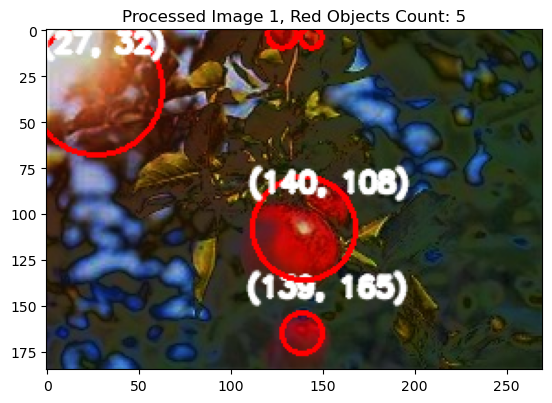

苹果坐标: 206.0 81.11538696289062
苹果坐标: 106.81864166259766 89.97796630859375
苹果坐标: 228.68605041503906 40.94186019897461


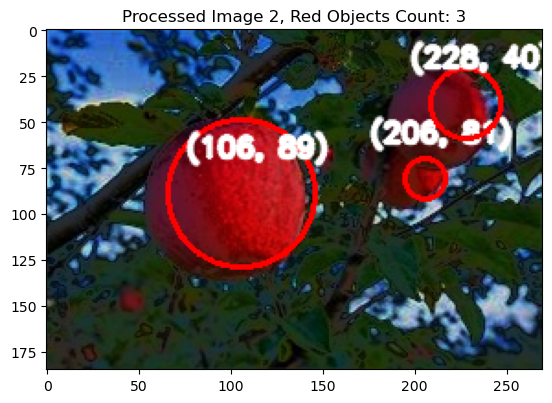

In [30]:
#这段代码实现的是对苹果颜色的识别并且标记坐标，注意，还不是最理想的模型
#我想要的最后还没有导出为一个文件夹
#而且坐标也不是完全正确，我现在还需要调整阈值，然后让更多人红色能够被识别，同时红色之间还要能够被区分
#我可能还需要从网上去找一些源代码
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
def ReadImg(image_path):
    img = cv2.imread(image_path, 1)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    return dst

# 开运算（替代 open_mor）
def open_mor(img):
    kernel = np.ones((5, 5), np.uint8)
    result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return result

# 红色对象检测
def detect_red_objects(src):
    # 设定红色阈值范围
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])

    # 根据阈值构建掩模
    mask = cv2.inRange(src, lower_red, upper_red)

    # 使用掩模提取红色对象
    red_objects = cv2.bitwise_and(src, src, mask=mask)

    return red_objects

# 轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    apple_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # 假设红色对象的最小面积为100
            # 获取圆心和半径
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)

            # 绘制圆形
            cv2.circle(src, center, radius, (0, 0, 255), 2)

            # 绘制坐标
            cv2.putText(src, f'({center[0]}, {center[1]})', (center[0] - 30, center[1] - 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            apple_count += 1
            #打印坐标
            print('苹果坐标:', x, y)
    return src, apple_count

# 处理所有图像
for i in range(1, 3):  # 假设图像编号从1到200
    image_path = f'Attachment_2/{i}_processed.jpg'
    src = ReadImg(image_path)
    gaus_img = GausBlur(src)
    red_objects_img = detect_red_objects(gaus_img)
    gray_img = cv2.cvtColor(red_objects_img, cv2.COLOR_BGR2GRAY)
    _, thres_img = cv2.threshold(gray_img, 1, 255, cv2.THRESH_BINARY)
    open_img = open_mor(thres_img)
    result_img, apple_count = draw_shape(open_img, src)

    # 显示图像
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Processed Image {i}, Red Objects Count: {apple_count}')
    plt.show()

In [ ]:
#这段代码实现的是，输出每一张图片的直方图
#这个直方图显示的是每张图像经过高斯滤波后的灰度图的像素值分布情况。让我详细解释一下直方图的含义：
#X轴（Pixel Value）：X轴表示图像的像素值范围，通常在0到255之间。每个像素值对应图像中的一种颜色强度，0表示最暗（黑色），255表示最亮（白色）。
#Y轴（Frequency）Y轴表示每个像素值在图像中出现的频率。直方图的高度越高，表示相应像素值在图像中出现的越频繁。
#通过观察直方图，你可以了解到图像中不同颜色强度的分布情况。例如，直方图中的峰值表示图像中存在某个颜色的强烈区域，而低谷可能表示图像中的一些相对较暗或较亮的区域。
#在这个例子中，我们使用了高斯滤波对图像进行了模糊处理，因此直方图展示了模糊后图像的灰度分布。如果有特定的颜色范围（例如红色）感兴趣，可以在相应的通道上计算直方图。
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
def ReadImg(image_path):
    img = cv2.imread(image_path, 1)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    return dst

# 红色对象检测
def detect_red_objects(src):
    # 设定红色阈值范围
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])

    # 根据阈值构建掩模
    mask = cv2.inRange(src, lower_red, upper_red)

    # 使用掩模提取红色对象
    red_objects = cv2.bitwise_and(src, src, mask=mask)

    return red_objects

# 轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    apple_count = 0
    apple_positions = []
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # 调整最小面积的阈值
            # 获取圆心和半径
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)

            # 绘制圆形
            cv2.circle(src, center, radius, (0, 0, 255), 2)

            # 绘制坐标
            cv2.putText(src, f'({center[0]}, {center[1]})', (center[0] - 20, center[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            apple_count += 1
            # 将坐标添加到列表中
            apple_positions.append((center[0], center[1]))
            apple_count += 1

    return src, apple_count

# 处理所有图像
fig, axes = plt.subplots(nrows=200, ncols=2, figsize=(12, 400))

for i in range(1, 201):  # 假设图像编号从1到200
    image_path = f'Attachment_2/{i}_processed.jpg'
    src = ReadImg(image_path)
    gaus_img = GausBlur(src)

    # 绘制原图
    axes[i - 1, 0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    axes[i - 1, 0].set_title(f'Original Image {i}')

    # 绘制灰度直方图
    gray_img = cv2.cvtColor(gaus_img, cv2.COLOR_BGR2GRAY)
    axes[i - 1, 1].hist(gray_img.ravel(), bins=256, range=[0, 256], density=True, color='orange', alpha=0.5)
    axes[i - 1, 1].set_title(f'Grayscale Histogram - Image {i}')
    axes[i - 1, 1].set_xlabel('Pixel Value')
    axes[i - 1, 1].set_ylabel('Frequency')

# 设置整体图形的间距
plt.tight_layout()
plt.show()

In [ ]:
#这段代码实现的是使用分水岭后的结果
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取图片
def ReadImg(image_path):
    img = cv2.imread(image_path, 1)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    return dst

# 开运算（替代 open_mor）
def open_mor(img):
    kernel = np.ones((5, 5), np.uint8)
    result = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return result

# 红色对象检测
def detect_red_objects(src):
    # 设定红色阈值范围
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])

    # 根据阈值构建掩模
    mask = cv2.inRange(src, lower_red, upper_red)

    # 使用掩模提取红色对象
    red_objects = cv2.bitwise_and(src, src, mask=mask)

    return red_objects

# 轮廓拟合
def draw_shape(open_img, src, markers):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    apple_count = 0
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # 假设红色对象的最小面积为100
            # 获取圆心和半径
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)

            # 绘制圆形
            cv2.circle(src, center, radius, (0, 0, 255), 2)

            apple_count += 1

    return src, apple_count

# 处理所有图像
for i in range(1, 201):  # 假设图像编号从1到200
    image_path = f'Attachment_2/{i}_processed.jpg'
    src = ReadImg(image_path)
    gaus_img = GausBlur(src)
    red_objects_img = detect_red_objects(gaus_img)
    gray_img = cv2.cvtColor(red_objects_img, cv2.COLOR_BGR2GRAY)
    _, thres_img = cv2.threshold(gray_img, 1, 255, cv2.THRESH_BINARY)
    open_img = open_mor(thres_img)

    # 分水岭
    sure_bg = cv2.dilate(open_img, None, iterations=3)
    dist_transform = cv2.distanceTransform(open_img, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(src, markers)

    # Use watershed result for counting
    result_img, apple_count = draw_shape(open_img, src, markers)

    # 显示图像
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.title(f'Processed Image {i}, Red Objects Count: {apple_count}')
    plt.show()

In [ ]:
import cv2
# 读取图像
image = cv2.imread('1_processed.jpg')
if image is None:
    print("无法读取图像文件，请检查文件路径和文件格式。")
# 指定高斯内核大小和标准差
kernel_size = (5, 5)
sigma = 1.0

# 进行高斯模糊
blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

# 显示原始图像和模糊后的图像
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Blurred Image', blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#高斯模糊
import cv2

# 读取图像
image = cv2.imread('1_processed.jpg')

if image is None:
    print("无法读取图像文件，请检查文件路径和文件格式。")
else:
    # 指定高斯内核大小和标准差
    kernel_size = (5, 5)
    sigma = 1.0

    # 进行高斯模糊
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma)

    # 保存模糊后的图像
    cv2.imwrite('blurred_image.jpg', blurred_image)
    print("模糊后的图像已保存到 blurred_image.jpg 文件。")

In [ ]:
#灰度处理
import cv2
import numpy as np

# 读取图像
image = cv2.imread('/Users/zhangying/1blurred_image.jpg')

if image is None:
    print("无法读取图像文件，请检查文件路径和文件格式。")
else:
    # 转换为灰度图像
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # 提取红色通道
    red_channel = image[:, :, 2]

    # 设置红色区域的阈值
    threshold_value = 150

    # 通过阈值处理强调红色区域
    red_mask = (red_channel > threshold_value).astype(np.uint8) * 255

    # 将红色区域与灰度图像相乘，将非红色区域变为黑色
    result_image = cv2.multiply(gray_image, red_mask / 255)

    # 显示原始图像、红色区域和处理后的图像
    cv2.imshow('Original Image', image)
    cv2.imshow('Red Region', red_mask)
    cv2.imshow('Processed Image', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

灰度图输出

In [ ]:
#直方图输出
#这段代码实现的是，输出每一张图片的直方图
#这个直方图显示的是每张图像经过高斯滤波后的灰度图的像素值分布情况。让我详细解释一下直方图的含义：
#X轴（Pixel Value）：X轴表示图像的像素值范围，通常在0到255之间。每个像素值对应图像中的一种颜色强度，0表示最暗（黑色），255表示最亮（白色）。
#Y轴（Frequency）Y轴表示每个像素值在图像中出现的频率。直方图的高度越高，表示相应像素值在图像中出现的越频繁。
#通过观察直方图，你可以了解到图像中不同颜色强度的分布情况。例如，直方图中的峰值表示图像中存在某个颜色的强烈区域，而低谷可能表示图像中的一些相对较暗或较亮的区域。
#在这个例子中，我们使用了高斯滤波对图像进行了模糊处理，因此直方图展示了模糊后图像的灰度分布。如果有特定的颜色范围（例如红色）感兴趣，可以在相应的通道上计算直方图。
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 创建保存直方图的文件夹
output_folder = 'histograms'
os.makedirs(output_folder, exist_ok=True)
# 读取图片
def ReadImg(image_path):
    img = cv2.imread(image_path, 1)
    return img

# 高斯滤波
def GausBlur(src):
    dst = cv2.GaussianBlur(src, (5, 5), 1.5)
    return dst

# 红色对象检测
def detect_red_objects(src):
    # 设定红色阈值范围
    lower_red = np.array([0, 0, 100])
    upper_red = np.array([100, 100, 255])

    # 根据阈值构建掩模
    mask = cv2.inRange(src, lower_red, upper_red)

    # 使用掩模提取红色对象
    red_objects = cv2.bitwise_and(src, src, mask=mask)

    return red_objects

# 轮廓拟合
def draw_shape(open_img, src):
    contours, hierarchy = cv2.findContours(open_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    apple_count = 0
    apple_positions = []
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # 调整最小面积的阈值
            # 获取圆心和半径
            (x, y), radius = cv2.minEnclosingCircle(cnt)
            center = (int(x), int(y))
            radius = int(radius)

            # 绘制圆形
            cv2.circle(src, center, radius, (0, 0, 255), 2)

            # 绘制坐标
            cv2.putText(src, f'({center[0]}, {center[1]})', (center[0] - 20, center[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
            apple_count += 1
            # 将坐标添加到列表中
            apple_positions.append((center[0], center[1]))
            apple_count += 1

    return src, apple_count

# 处理所有图像
fig, axes = plt.subplots(nrows=200, ncols=2, figsize=(12, 400))

for i in range(1, 201):  # 假设图像编号从1到200
    image_path = f'Attachment_2/{i}_processed.jpg'
    src = ReadImg(image_path)
    gaus_img = GausBlur(src)

    # 绘制原图
    axes[i - 1, 0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
    axes[i - 1, 0].set_title(f'Original Image {i}')

    # 绘制灰度直方图
    gray_img = cv2.cvtColor(gaus_img, cv2.COLOR_BGR2GRAY)
    plt.figure()
    plt.hist(gray_img.ravel(), bins=256, range=[0, 256], density=True, color='orange', alpha=0.5)
    plt.title(f'Grayscale Histogram - Image {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.savefig(os.path.join(output_folder, f'histogram_image_{i}.png'))
    plt.close()
# 设置整体图形的间距
plt.tight_layout()
plt.show()

In [11]:
#灰度
from PIL import Image

def quick_to_gray_image(image):
    width, height = image.size
    data = list(image.getdata())
    
    for y in range(height):
        for x in range(width):
            index = y * width + x
            gray = int(data[index][2] * 0.299 + data[index][1] * 0.587 + data[index][0] * 0.114)
            new_color = (gray, gray, gray)
            data[index] = new_color

    new_image = Image.new("RGB", (width, height))
    new_image.putdata(data)
    return new_image

def to_gray_image(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            cc = image.getpixel((x, y))
            cx = min(255, int(cc[0] * 0.299 + cc[1] * 0.587 + cc[2] * 0.114))
            image.putpixel((x, y), (cx, cx, cx))

# 示例用法
# bmp = Image.open("your_image_path.bmp")
# quick_to_gray_image(bmp).show()
# 或者
# to_gray_image(bmp).show()

In [10]:
pip install Pillow


DEPRECATION: Loading egg at /Users/zhangying/anaconda3/lib/python3.11/site-packages/baidu_aip-4.16.13-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [28]:
from PIL import Image

def quick_to_gray_image(image_path):
    # 打开图像
    image = Image.open(image_path)
    width, height = image.size
    
    # 转换为灰度图像
    data = list(image.getdata())
    for y in range(height):
        for x in range(width):
            index = y * width + x
            gray = int(data[index][2] * 0.299 + data[index][1] * 0.587 + data[index][0] * 0.114)
            new_color = (gray, gray, gray)
            data[index] = new_color

    # 创建新图像并保存
    new_image = Image.new("RGB", (width, height))
    new_image.putdata(data)
    new_image.save("quick_gray_image.jpg")

def to_gray_image(image_path):
    # 打开图像
    image = Image.open(image_path)
    width, height = image.size

    # 转换为灰度图像
    for y in range(height):
        for x in range(width):
            cc = image.getpixel((x, y))
            cx = min(255, int(cc[0] * 0.857 + cc[1] * 0.3 + cc[2] * 0.214))
            image.putpixel((x, y), (cx, cx, cx))

    # 保存新图像
    image.save("gray_image.jpg")

# 示例用法
quick_to_gray_image("/Users/zhangying/1blurred_image.jpg")
to_gray_image("/Users/zhangying/1blurred_image.jpg")

In [16]:
from PIL import Image

def enhance_red_channel(image_path, factor=1.5):
    # 打开图像
    image = Image.open(image_path)
    width, height = image.size

    # 增强红色通道
    for y in range(height):
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            enhanced_red = min(255, int(r * factor))
            image.putpixel((x, y), (enhanced_red, g, b))

    # 保存新图像
    image.save("enhanced_red_channel.jpg")

# 示例用法，默认增强因子为1.5，可以根据需要调整
enhance_red_channel("/Users/zhangying/1blurred_image.jpg")

In [17]:
from PIL import Image

def enhance_red_channel(image_path, red_factor=1.5, ignore_threshold=150):
    # 打开图像
    image = Image.open(image_path)
    width, height = image.size

    # 增强红色通道，同时忽略太阳光、白色、蓝色和绿色
    for y in range(height):
        for x in range(width):
            r, g, b = image.getpixel((x, y))
            
            # 设置阈值以忽略太阳光、白色、蓝色和绿色
            if r > ignore_threshold or g > ignore_threshold or b > ignore_threshold:
                continue
            
            enhanced_red = min(255, int(r * red_factor))
            image.putpixel((x, y), (enhanced_red, g, b))

    # 保存新图像
    image.save("enhanced_red_apple.jpg")

# 示例用法，默认红色通道增强因子为1.5，可以根据需要调整
enhance_red_channel("/Users/zhangying/1blurred_image.jpg")

In [18]:
import cv2
import numpy as np
from PIL import Image

def process_image(image_path, red_factor=1.5, green_blur_factor=5, ignore_threshold=150):
    # 打开图像
    image = Image.open(image_path)
    width, height = image.size

    # 转为OpenCV格式
    cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

    # 增强红色通道，同时忽略太阳光、白色、蓝色和绿色
    for y in range(height):
        for x in range(width):
            r, g, b = cv_image[y, x]

            # 设置阈值以忽略太阳光、白色、蓝色和绿色
            if r > ignore_threshold or g > ignore_threshold or b > ignore_threshold:
                cv_image[y, x] = [0, 0, 0]  # 抹除太阳光部分
                continue

            # 增强红色通道
            enhanced_red = min(255, int(r * red_factor))
            cv_image[y, x] = [enhanced_red, g, b]

    # 提取绿色通道并进行模糊处理
    green_channel = cv_image[:, :, 1]
    blurred_green_channel = cv2.GaussianBlur(green_channel, (green_blur_factor, green_blur_factor), 0)
    cv_image[:, :, 1] = blurred_green_channel

    # 转回Pillow格式
    processed_image = Image.fromarray(cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB))

    # 保存新图像
    processed_image.save("processed_image.jpg")

# 示例用法，默认红色通道增强因子为1.5，绿色通道模糊因子为5，可以根据需要调整
process_image("/Users/zhangying/1blurred_image.jpg")